In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import spacy
from spacy import displacy

In [2]:
df = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Text Mining\\Elon_musk.csv", encoding='latin', index_col=0)
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text Preprocessing

In [3]:
df = [Text.strip() for Text in df.Text]
df = [Text for Text in df if Text]

In [4]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [5]:
df_join = ''.join(df)
df_join

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [6]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles = True)

df_tok = tokenizer.tokenize(df_join)
print(df_tok)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [7]:
df_tok_join =  ' '.join(df_tok)
df_tok_join

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

### Removing Punctuation

In [8]:
import string
df_punc = df_tok_join.translate(str.maketrans('','',string.punctuation))
df_punc

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

### Removing Urls

In [9]:
df_url = re.sub(r'http\S+', '', df_punc)
df_url

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Hea

### Tokenization

In [10]:
tweet_words = word_tokenize(df_url , language = 'english', preserve_line = True)
print(tweet_words)

['I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'It', '\x92', 's', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but',

In [11]:
nltk.data.path.append('C:\\Users\\prati\\anaconda3\\nltk_data')

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Removing Stopwords

In [13]:
stopwords = stopwords.words('english')

In [14]:
extrastopwords = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','Ö','orÖ']
stopwords.extend(extrastopwords)



tweet_nostopwords = [words for words in tweet_words if words not in stopwords]
print(tweet_nostopwords)

['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'sucksRT', 'NASA', 'sel

### Normalizing

In [15]:
tweets_lower = [Text.lower() for Text in tweet_nostopwords]
print(tweets_lower)

['alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'sel

### Stemming

In [16]:
stemmer = PorterStemmer()

In [17]:
for i in tweets_lower:
    print(stemmer.stem(i))

alien
idaacarmack
ray
trace
cyberpunk
hdr
nextlevel
have
tri
great
interview
gtera27
doge
underestim
teslacn
congratul
tesla
china
amaz
execut
last
year
now
next
even
happi
new
year
ox
underdog
all
thought
would
fail
himself
haha
thank
inde
tweet
definit
repres
realworld
time
allocationth
entertain
outcom
like
givedirectli
just
sent
somejust
agre
clubhous
tco3rwe9uhstsgeoffkeighley
it
get
realbought
dogecoin
lil
x
toddler
hodler
joshmanmod
he
definit
issu
sentenc
seem
bit
high
freewalletorg
thank
fix
freewalletorg
pleas
unlock
account
astrojordi
thi
true
power
ani
crypto
wallet
give
privat
key
avoid
cost
freewalletorg
your
app
sucksrt
nasa
select
falcon
heavi
launch
first
two
element
lunar
gateway
togeth
one
mission
blkmdl3
onc
predict
cash
flow
reason
well
starlink
ipo
rationaletienn
starlink
staggeringli
difficult
technic
econom
endeavor
howev
spacex
need
pass
deep
chasm
neg
cash
flow
next
year
lowest
cost
per
ton
carbon
sequest
net
valu
product
made
must
scalabl
g
it
meant
price
cou

### Lemmatization

In [24]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...


True

In [25]:
lemma = WordNetLemmatizer()

In [26]:
clean_tweets = []

for i in tweets_lower:
    print(lemma.lemmatize(i))
    clean_tweets.append(lemma.lemmatize(i))

alien
idaacarmack
ray
tracing
cyberpunk
hdr
nextlevel
have
tried
great
interview
gtera27
doge
underestimated
teslacn
congratulation
tesla
china
amazing
execution
last
year
now
next
even
happy
new
year
ox
underdoge
all
thought
would
fail
himself
haha
thanks
indeed
tweet
definitely
represent
realworld
time
allocationthe
entertaining
outcome
likely
givedirectly
just
sent
somejust
agree
clubhouse
tco3rwe9uhstsgeoffkeighley
it
getting
realbought
dogecoin
lil
x
toddler
hodler
joshmanmode
he
definitely
issue
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
this
true
power
any
crypto
wallet
give
private
key
avoided
cost
freewalletorg
your
app
sucksrt
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
blkmdl3
once
predict
cash
flow
reasonably
well
starlink
ipo
rationaletienne
starlink
staggeringly
difficult
technical
economic
endeavor
however
spacex
need
pas
deep
chasm
negative
cash
flow
next
year
lowest
cos

In [27]:
print (clean_tweets)

['alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoided', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'selected

In [28]:
clean_tweets_joined = ' '.join(clean_tweets)
clean_tweets_joined

'alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulation tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet give private key avoided cost freewalletorg your app sucksrt nasa selected falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest co

## Feature Extraction

### Count Vectorizer

In [29]:
cv = CountVectorizer()

In [30]:
tweets_cv = cv.fit_transform(clean_tweets)
cv.vocabulary_

{'alien': 240,
 'idaacarmack': 1773,
 'ray': 2869,
 'tracing': 3728,
 'cyberpunk': 932,
 'hdr': 1662,
 'nextlevel': 2420,
 'have': 1655,
 'tried': 3752,
 'great': 1583,
 'interview': 1891,
 'gtera27': 1601,
 'doge': 1081,
 'underestimated': 3911,
 'teslacn': 3591,
 'congratulation': 824,
 'tesla': 3589,
 'china': 717,
 'amazing': 266,
 'execution': 1283,
 'last': 2025,
 'year': 4180,
 'now': 2457,
 'next': 2419,
 'even': 1256,
 'happy': 1638,
 'new': 2417,
 'ox': 2574,
 'underdoge': 3910,
 'all': 242,
 'thought': 3655,
 'would': 4163,
 'fail': 1321,
 'himself': 1708,
 'haha': 1615,
 'thanks': 3617,
 'indeed': 1826,
 'tweet': 3790,
 'definitely': 983,
 'represent': 2952,
 'realworld': 2892,
 'time': 3673,
 'allocationthe': 245,
 'entertaining': 1220,
 'outcome': 2550,
 'likely': 2086,
 'givedirectly': 1548,
 'just': 1961,
 'sent': 3138,
 'somejust': 3290,
 'agree': 215,
 'clubhouse': 753,
 'tco3rwe9uhstsgeoffkeighley': 3546,
 'it': 1914,
 'getting': 1533,
 'realbought': 2884,
 'dogecoin

In [31]:
tweets_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
print(tweets_cv.toarray().shape)

(11929, 4215)


## Count Vectorizer (Bigram/Trigram)

In [33]:
cv_ngrams = CountVectorizer(analyzer = 'word',ngram_range = (1,3),max_features = 100)

In [34]:
tweets_cv2 = cv_ngrams.fit_transform(clean_tweets)
cv_ngrams.vocabulary_

{'great': 28,
 'tesla': 72,
 'year': 98,
 'next': 49,
 'even': 16,
 'new': 48,
 'would': 96,
 'haha': 29,
 'thanks': 76,
 'time': 84,
 'it': 32,
 'high': 31,
 'this': 83,
 'true': 85,
 'falcon': 19,
 'launch': 34,
 'first': 20,
 'one': 52,
 'mission': 43,
 'well': 91,
 'starlink': 66,
 'spacex': 65,
 'need': 47,
 'product': 59,
 'earth': 12,
 'mar': 41,
 'team': 71,
 'that': 77,
 'work': 94,
 'go': 26,
 'erdayastronaut': 15,
 'booster': 5,
 'back': 2,
 'people': 54,
 'not': 51,
 'the': 78,
 'yeah': 97,
 'thing': 81,
 'get': 25,
 'future': 24,
 'landing': 33,
 'will': 93,
 'still': 68,
 'engine': 13,
 'good': 27,
 'point': 55,
 'actually': 0,
 'we': 89,
 'working': 95,
 'super': 69,
 'hard': 30,
 'dragon': 11,
 'make': 39,
 'crew': 9,
 'lot': 37,
 'no': 50,
 'day': 10,
 'sure': 70,
 'teslaownerssv': 73,
 'love': 38,
 'better': 4,
 'car': 6,
 'engineering': 14,
 'production': 60,
 'space': 64,
 'coming': 7,
 'part': 53,
 'rocket': 62,
 'there': 79,
 'probably': 58,
 'month': 45,
 'wholem

In [35]:
tweets_cv2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
print(tweets_cv2.toarray().shape)

(11929, 100)


### TF-IDF Vectorizer

In [37]:
tf = TfidfVectorizer()

tweets_tf = tf.fit_transform(clean_tweets)

In [39]:
tweets_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
print(tweets_tf.toarray().shape)

(11929, 4215)


## Word Cloud

In [41]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
stop = STOPWORDS

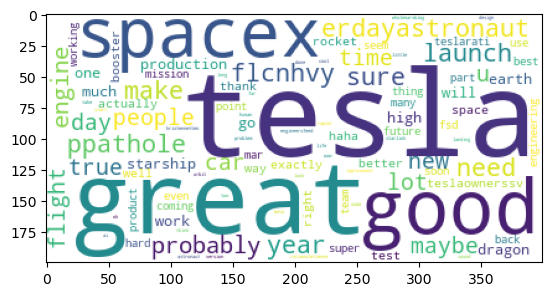

In [42]:
wc = WordCloud(background_color='white', max_words=100,stopwords=stop).generate(clean_tweets_joined)
plt.imshow(wc)

## Named Entity Recognition and Parts of Speech

In [43]:
nlp = spacy.load('en_core_web_sm')

In [44]:
x = nlp(clean_tweets_joined)

In [46]:
displacy.render(x, style='ent')

In [47]:
for i in x:
    print(i, '-',i.pos_)

alien - PROPN
idaacarmack - PROPN
ray - PROPN
tracing - VERB
cyberpunk - NOUN
hdr - NOUN
nextlevel - NOUN
have - AUX
tried - VERB
great - ADJ
interview - NOUN
gtera27 - NOUN
doge - PROPN
underestimated - VERB
teslacn - PROPN
congratulation - PROPN
tesla - PROPN
china - PROPN
amazing - ADJ
execution - NOUN
last - ADJ
year - NOUN
now - ADV
next - ADV
even - ADV
happy - ADJ
new - ADJ
year - NOUN
ox - NOUN
underdoge - NOUN
all - DET
thought - NOUN
would - AUX
fail - VERB
himself - PRON
haha - ADP
thanks - NOUN
indeed - ADV
tweet - PROPN
definitely - ADV
represent - VERB
realworld - PROPN
time - NOUN
allocationthe - PROPN
entertaining - ADJ
outcome - NOUN
likely - ADV
givedirectly - ADV
just - ADV
sent - VERB
somejust - ADJ
agree - ADJ
clubhouse - NOUN
tco3rwe9uhstsgeoffkeighley - PROPN
it - PRON
getting - AUX
realbought - VERB
dogecoin - NOUN
lil - NOUN
x - PUNCT
toddler - PROPN
hodler - PROPN
joshmanmode - PROPN
he - PRON
definitely - ADV
issue - VERB
sentencing - NOUN
seems - VERB
bit - 

## Emotion Mining - Sentiment Analysis

In [48]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [49]:
sentences_df = pd.DataFrame(sentences, columns = ['sentence'])
sentences_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


### Emotion Lexicon - Affin

In [53]:
affin=pd.read_csv("D:\\Data Science\\Data Science Assignment\\Text Mining\\Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [54]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [55]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

In [56]:
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

### Calculating sentiment value for each sentence

In [57]:
calculate_sentiment(text='great')

3

In [58]:
sentences_df['sentiment_value']=sentences_df['sentence'].apply(calculate_sentiment)
sentences_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [59]:
sentences_df['word_count']=sentences_df['sentence'].str.split().apply(len)
sentences_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [60]:
sentences_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [61]:
sentences_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [62]:
# Negetive Sentiment Score
sentences_df[sentences_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [63]:
# Positive Sentiment Score
sentences_df[sentences_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [64]:
sentences_df['index']=range(0,len(sentences_df))
sentences_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


## Visualization

C:\Users\prati\AppData\Local\Temp\ipykernel_9616\1993676871.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentences_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

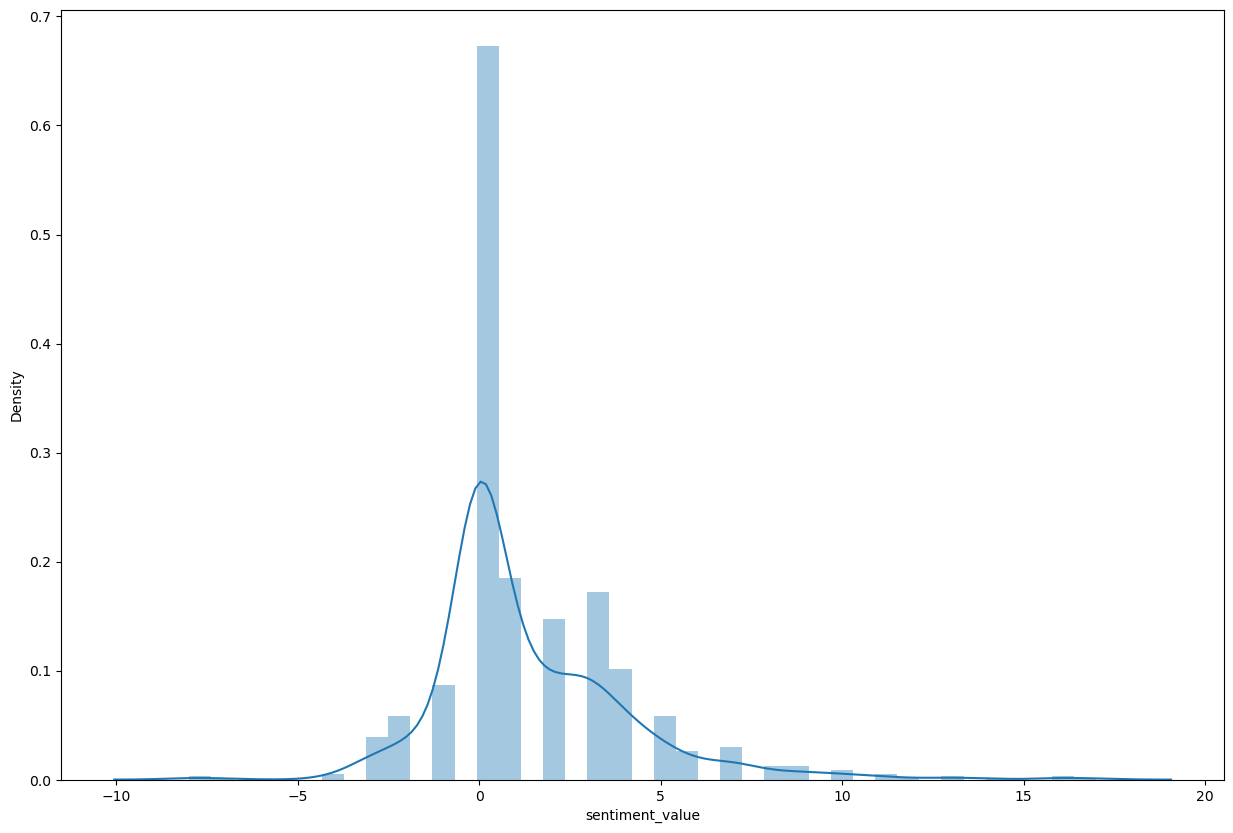

In [66]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sentences_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

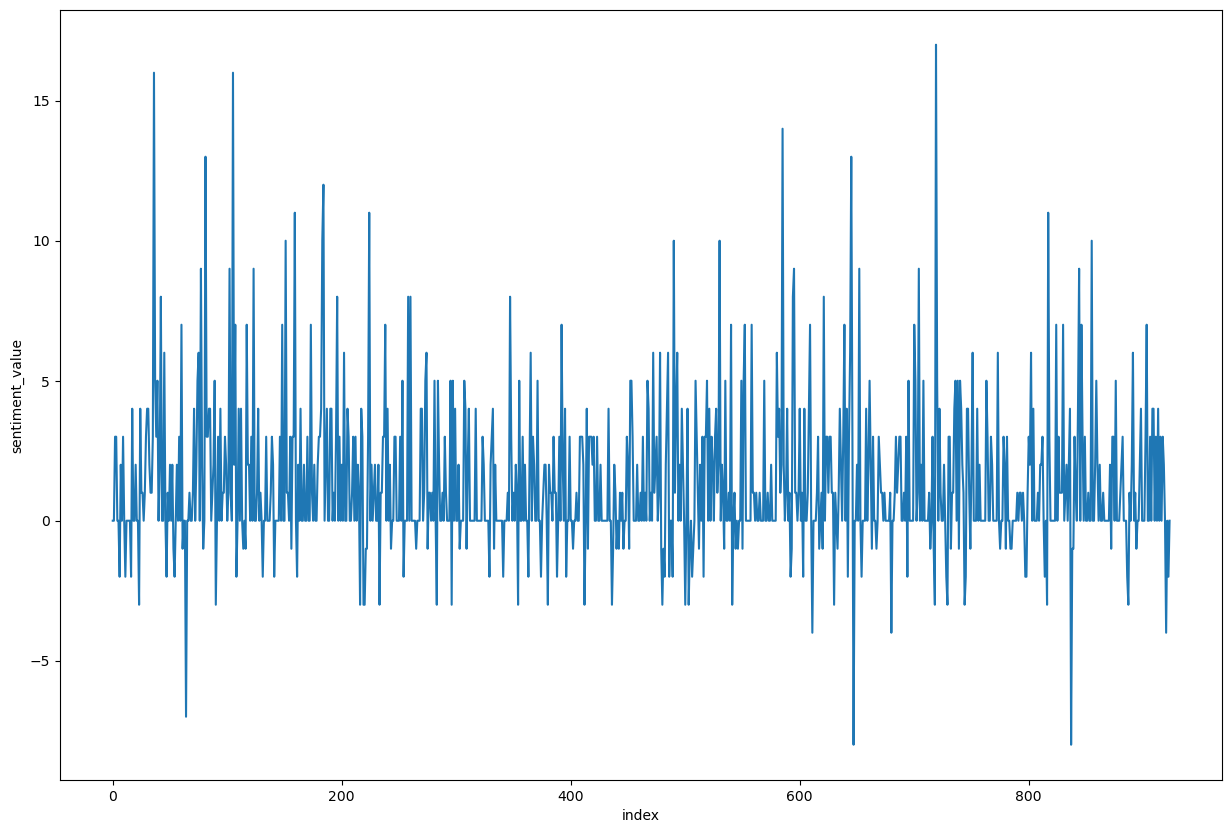

In [67]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentences_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

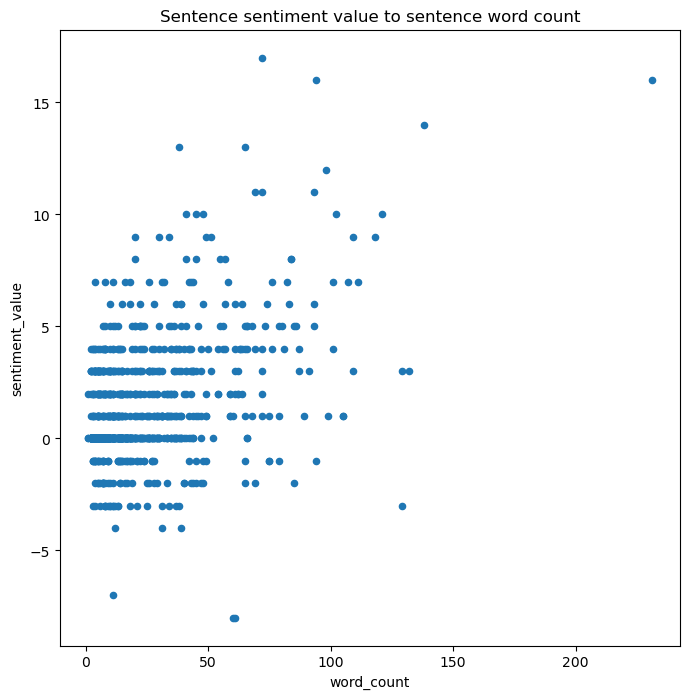

In [68]:
sentences_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

### Conclusion

Number of positive tweets are more than number of negative tweets

## End